# Importing modules

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import time
import random
import math
from IPython.display import clear_output

# Importing own code

In [51]:
from generateSpace import *
from plotLattice import *
from getTriangleLengths import *
from potentialEnergyPerTrio import *
from potentialEnergy import *
from potentialEnergyPerParticle import *
from numberOfCalculations import *
from makeRandomDatabase import *

## Auxiliarycode

In [52]:
def return1(lengths):
    return 1

def predictedCalculationTime(numberOfSurroundingCells, numberOfParticlesPerCell = 4, timePerTriangle = 15*(10**-6)):
    
    return timePerTriangle * numberOfCalculationsGeneration(numberOfSurroundingCells, numberOfParticlesPerCell)

predictedCalculationTime(4, 4)

3.0912599999999997

# Testing

## Testing functionality

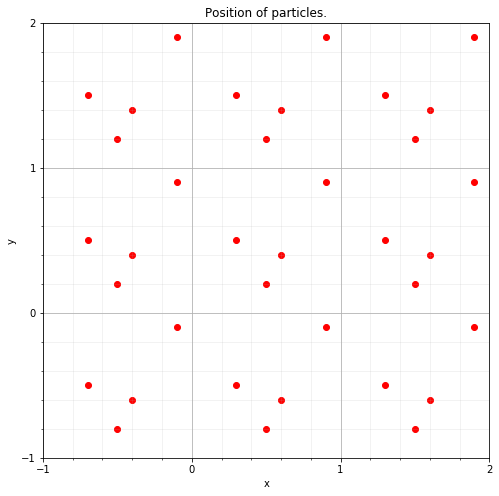

11486539.900954507

In [53]:
atoms = [np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4]), np.array([0.5, 0.2])]

totalSpace = generateSpace(atoms, 1, 1.0, False)
plotLattice(totalSpace)

otherSpace = generateSpace(atoms, 1, 1.0)

potentialEnergy(otherSpace, atoms, potentialEnergyPerTrio)

In [54]:
potentialEnergy(generateSpace(atoms, 4, 1.0), atoms, return1)# Results from wolfram are 206084

206084

## Testing quality of potential energy particle

In [55]:
def potentialEnergyPerTrioExperimental(lengths, strengthShortRange=1):
    """
    """
    
    a = lengths[0]
    b = lengths[1]
    c = lengths[2]
    
    s = (a + b + c) / 2
    area2Triangle = s * (s - a) * (s - b) * (s - c)
    
    shortRangePotential = (area2Triangle * (a + b + c)**-6)**2#strengthShortRange * (a**-8 + b**-8 + c**-8)
    longRangePotential = - area2Triangle * (a + b + c)**-6
    
    return (shortRangePotential + longRangePotential)

-0.24983451462664988
-1.607484447172581e-05


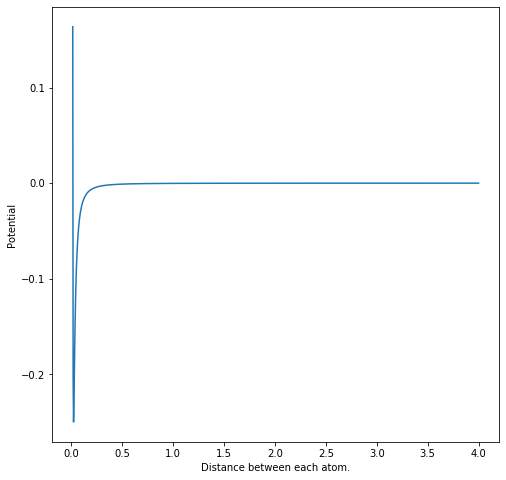

In [56]:
yCoordinates = np.linspace(0.015, 4, 1000, endpoint=True)

results =[]

for yCoordinate in yCoordinates:
    results.append(potentialEnergyPerTrioExperimental([yCoordinate, yCoordinate, yCoordinate]))

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(yCoordinates, results)
ax.set_xlabel('Distance between each atom.')
ax.set_ylabel('Potential')
print(min(results))
print(potentialEnergyPerTrioExperimental([max(yCoordinates), max(yCoordinates), max(yCoordinates)]))

-21.439523775616305
-21.175460407908762


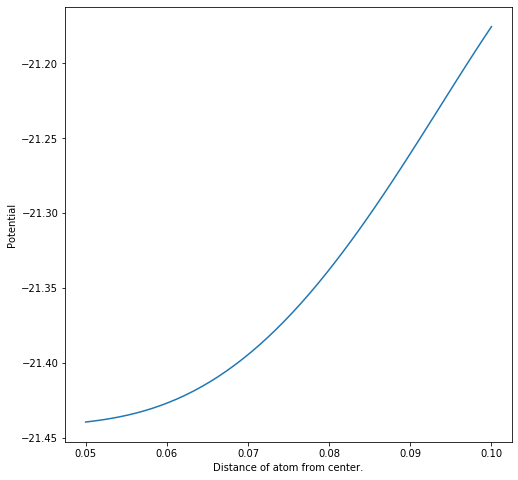

In [59]:
atoms = [np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4]), np.array([0.5, 0.2])]

yCoordinates = np.linspace(0.1/2, 0.2/2, 50, endpoint=True)
widthOfCell = 0.3

results =[]

for yCoordinate in yCoordinates:
    particles = [np.array([widthOfCell / 2 + yCoordinate, widthOfCell / 2 + yCoordinate]), np.array([widthOfCell / 2 + yCoordinate, widthOfCell / 2 - yCoordinate]), np.array([widthOfCell / 2 - yCoordinate, widthOfCell / 2 + yCoordinate]), np.array([widthOfCell / 2 - yCoordinate, widthOfCell / 2 - yCoordinate])]
    otherSpace = generateSpace(particles, 4, widthOfCell)
    results.append(potentialEnergy(otherSpace, particles, potentialEnergyPerTrioExperimental))

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(yCoordinates, results)
ax.set_xlabel('Distance of atom from center.')
ax.set_ylabel('Potential')
print(min(results))
print(max(results))

## Checking convergence

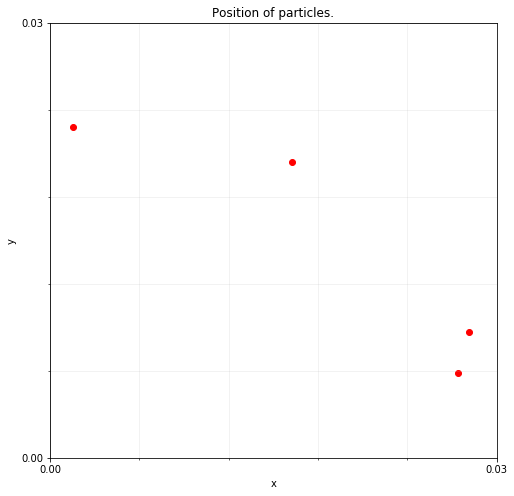

"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

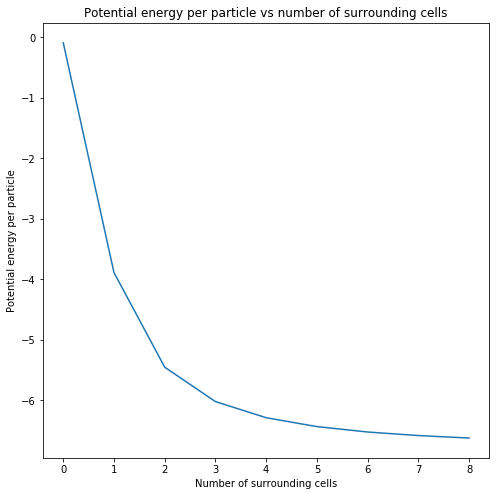

In [58]:
numberOfSurroundingCells = [i for i in range(0,9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 0.03

atoms = [np.array([random.uniform(0, widthOfCell), random.uniform(0, widthOfCell)]) for j in range(0, 4)]

plotLattice(atoms, widthOfCell)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

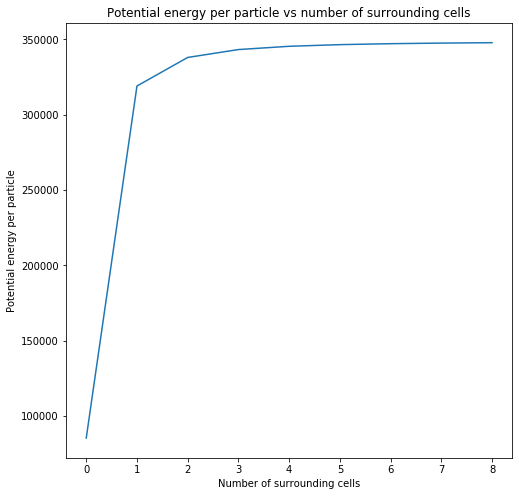

In [10]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 1.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

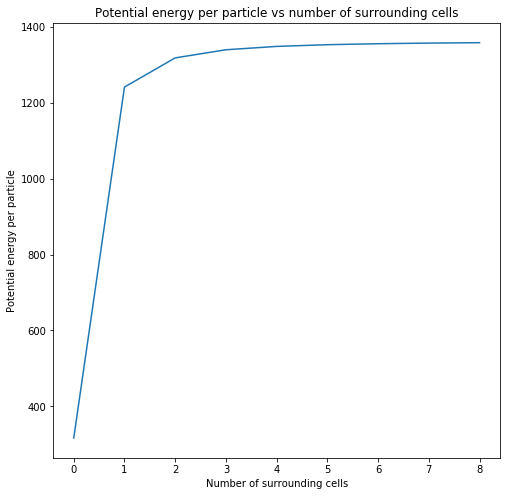

In [11]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 2.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

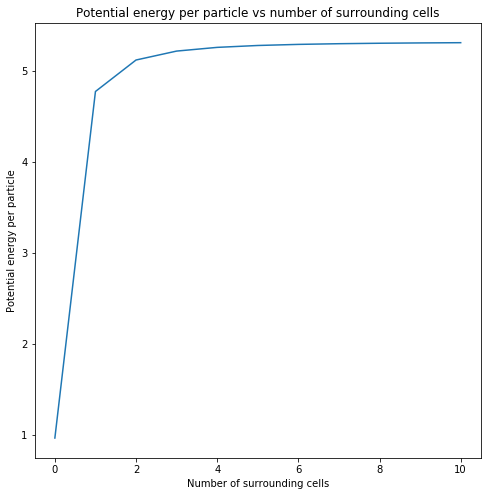

In [12]:
numberOfSurroundingCells = [i for i in range(0, 11)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 4.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

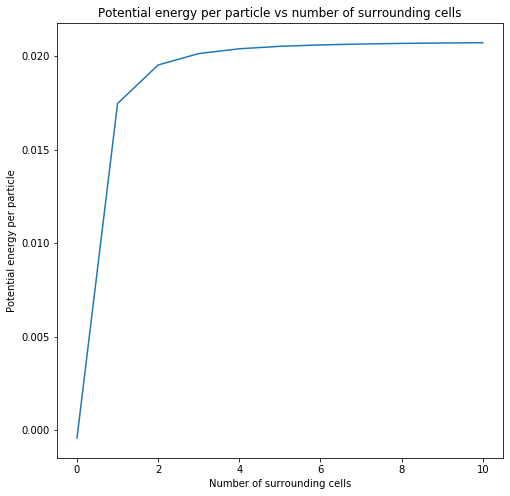

In [13]:
numberOfSurroundingCells = [i for i in range(0, 11)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 8.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

## Testing and predicting fucntion speed

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[2.0003318786621095e-06, 0.00016803741455078124, 0.0005101146697998047, 0.0009222078323364258, 0.0015744709968566895, 0.0023695969581604003, 0.003283754348754883, 0.0043380651473999025, 0.005696396350860596, 0.00583371353149414, 0.006743654251098633]


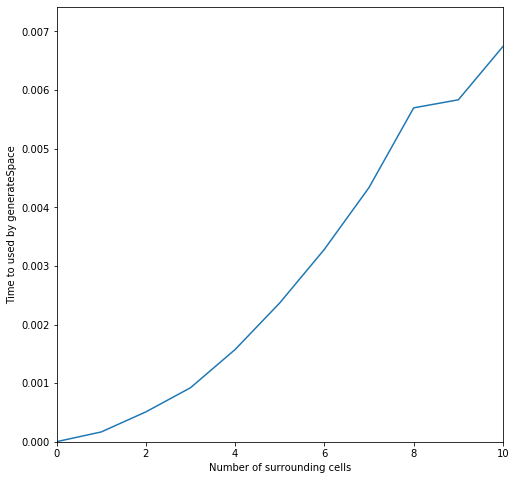

In [14]:
numberOfMeasurements = 500

xVariable = [i for i in range(0, 11)]
yVariable =[]

for i in xVariable:
    timeStart = time.time()
    [generateSpace(atoms, i, 1.0) for j in range(numberOfMeasurements)]
    timeEnd = time.time()
    yVariable.append((timeEnd - timeStart)/numberOfMeasurements)
    
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(xVariable, yVariable)
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time to used by generateSpace')
ax.set_xlim([min(xVariable), max(xVariable)])
ax.set_ylim([0, 1.1 * max(yVariable)])

print(xVariable)
print(yVariable)

In [15]:
%timeit potentialEnergyPerTrio(getTriangleLengths(np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4])))

39.3 µs ± 1.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Calculating with 0 surrounding cells.
0.00033346811930338543
Calculating with 1 surrounding cells.
0.06834864616394043
Calculating with 2 surrounding cells.
0.5821349620819092
Calculating with 3 surrounding cells.
2.2915478547414145
Calculating with 4 surrounding cells.
6.438863118489583
Calculating with 5 surrounding cells.
12.965787490208944
Calculating with 6 surrounding cells.
26.98380732536316
Calculating with 7 surrounding cells.
36.33229374885559
Calculating with 8 surrounding cells.
42.48943328857422
Calculating with 9 surrounding cells.
56.42006103197733
Calculating with 10 surrounding cells.
83.96684861183167

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.00033346811930338543, 0.06834864616394043, 0.5821349620819092, 2.2915478547414145, 6.438863118489583, 12.965787490208944, 26.98380732536316, 36.33229374885559, 42.48943328857422, 56.42006103197733, 83.96684861183167]
[5.9999999999999995e-05, 0.0327, 0.2823, 1.1175, 3.0912599999999997, 6.94086, 13.5879, 24.138299999999997, 39.8822999

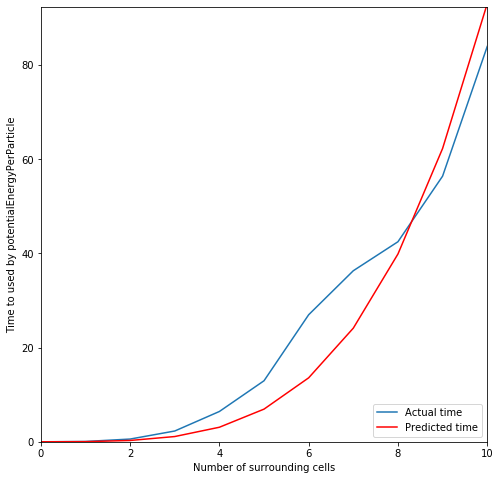

In [16]:
numberOfMeasurements = 3

atoms = [np.array([random.uniform(0, 5.0), random.uniform(0, 5.0)]) for j in range(0, 4)]

xVariable = [i for i in range(0, 11)]
yVariable =[]

for i in xVariable:
    print('Calculating with ' + str(i) + ' surrounding cells.')
    space = generateSpace(atoms, i, 1.0)
    timeStart = time.time()
    [potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrio) for j in range(numberOfMeasurements)]
    timeEnd = time.time()
    print((timeEnd - timeStart)/numberOfMeasurements)
    yVariable.append((timeEnd - timeStart)/numberOfMeasurements)

print('')
yVariablePredict = [predictedCalculationTime(i, len(atoms)) for i in xVariable]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(xVariable, yVariable)
ax.plot(xVariable, yVariablePredict, c='r')
plt.legend(['Actual time', 'Predicted time' ], loc=4)
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time to used by potentialEnergyPerParticle')
ax.set_xlim([min(xVariable), max(xVariable)])
ax.set_ylim([0, 1.1 * max(yVariable)])

print(xVariable)
print(yVariable)
print(yVariablePredict)

In [17]:
def test(listVectors):
    vectorA = listVectors[0]
    vectorB = listVectors[1]
    diffrences = vectorA - vectorB
    sum = math.pow(diffrences.dot(diffrences), -1)
    

%timeit test([np.array([1, 0]), np.array([1.0, 2])])

5.42 µs ± 38.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
